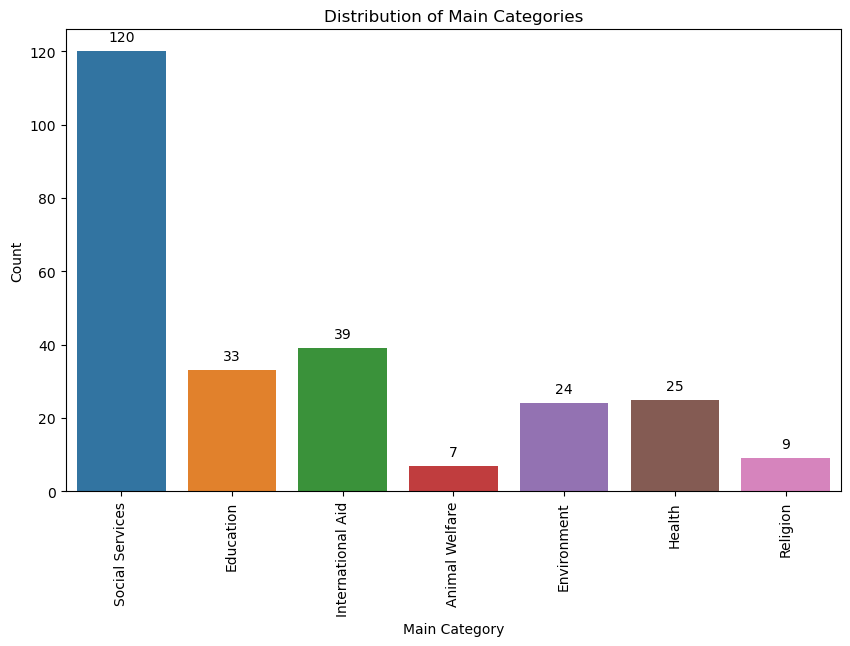

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('give-buddy-data.csv')

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='main_category', data=data)
plt.title('Distribution of Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

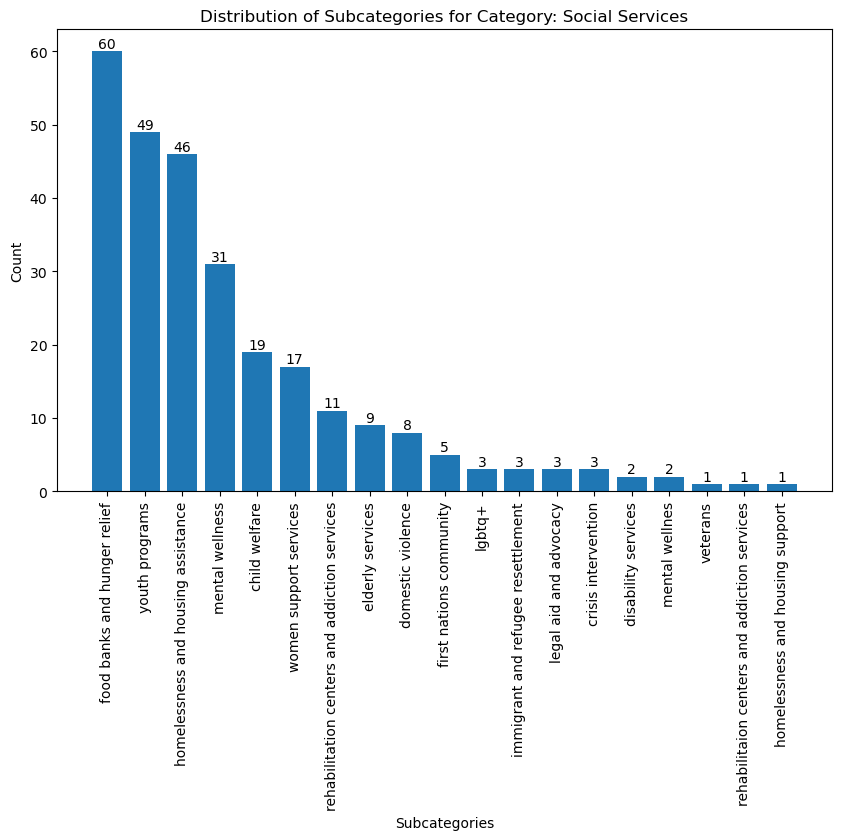

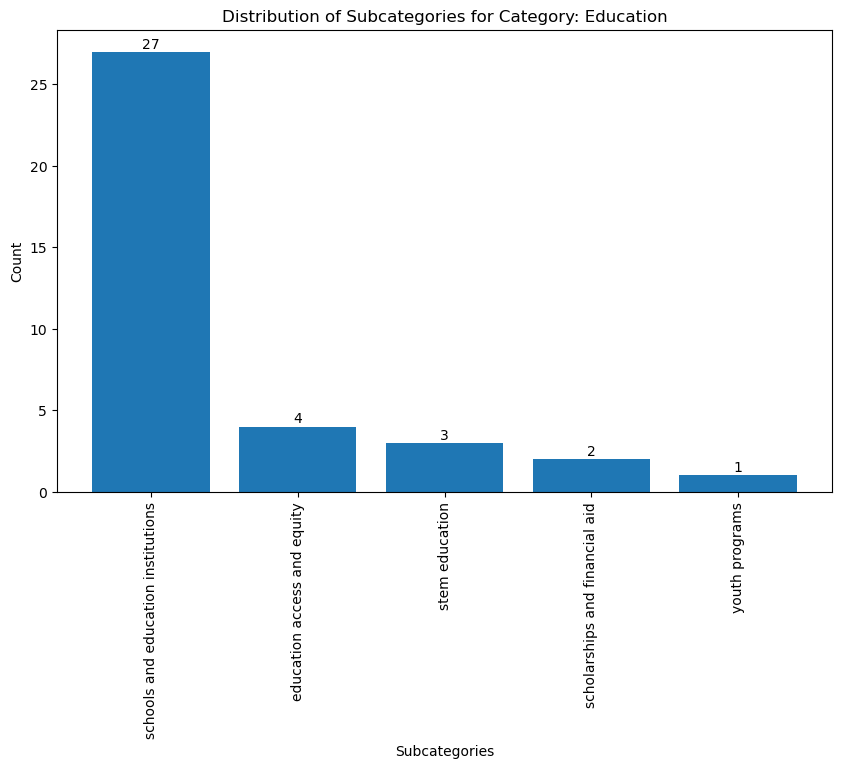

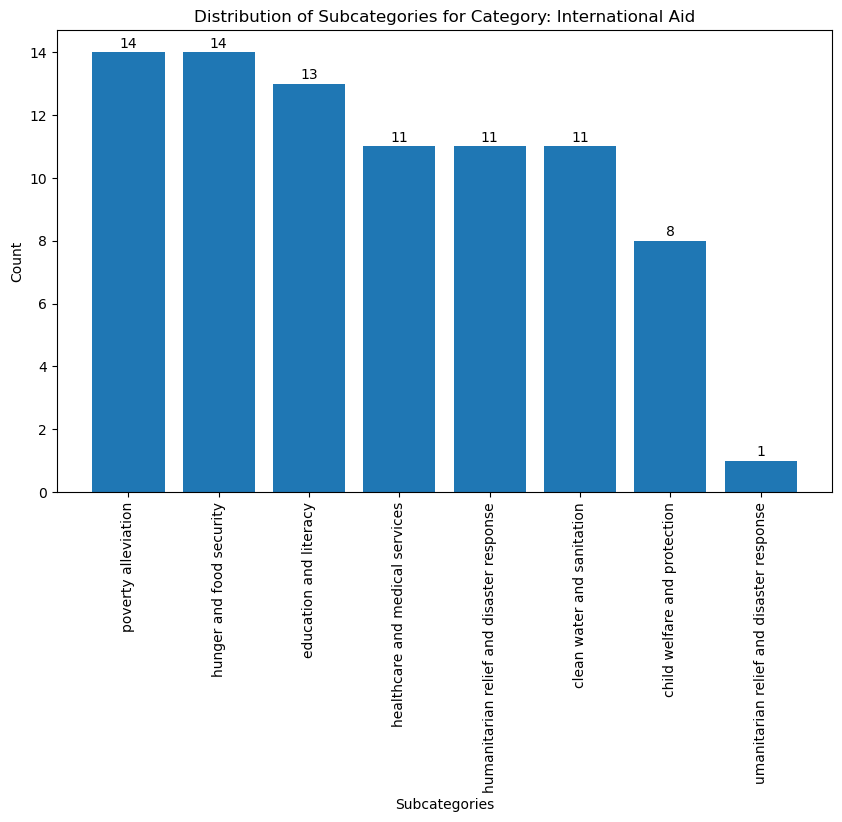

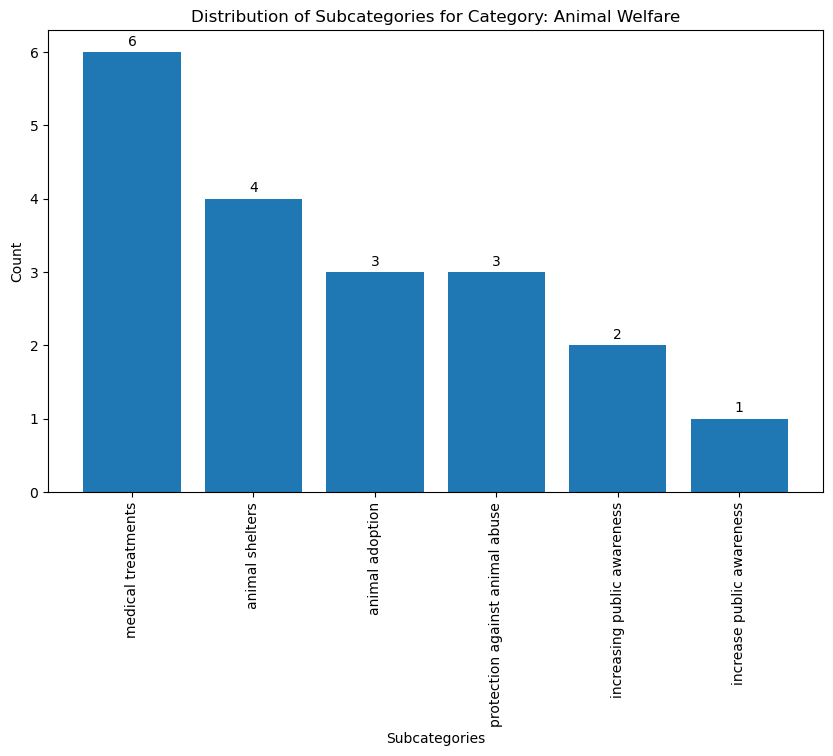

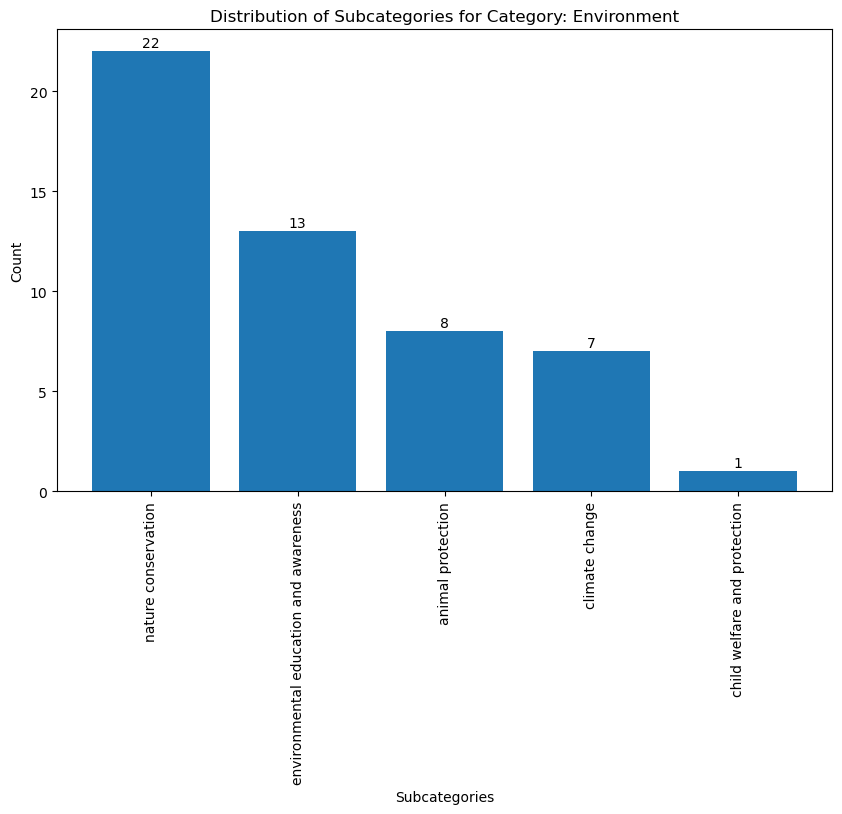

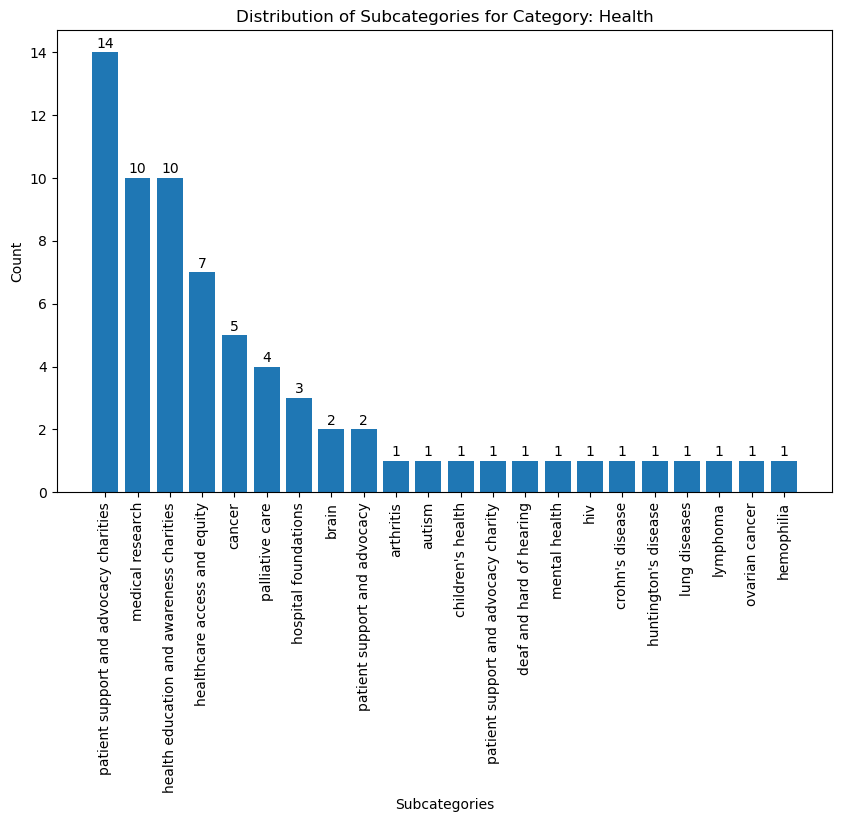

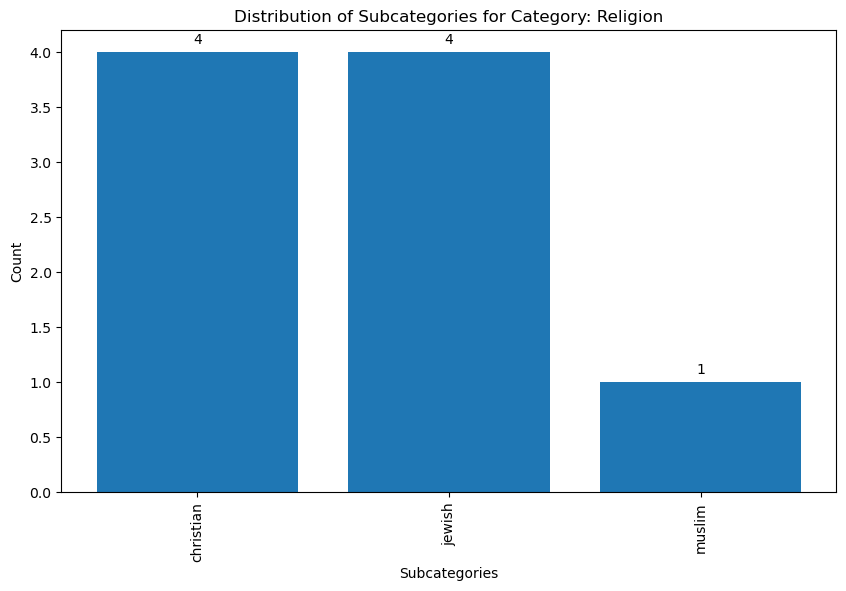

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('give-buddy-data.csv')

all_subcategories = []
for subcats in data['sub_category'].str.split(', '):
    all_subcategories.extend(subcats)
unique_subcategories = set(map(str.lower, map(str.strip, all_subcategories)))

category_subcategory_counts = {}
for index, row in data.iterrows():
    categories = row['main_category'].split(', ')
    subcategories = row['sub_category'].split(', ')
    for category in categories:
        if category not in category_subcategory_counts:
            category_subcategory_counts[category] = {}
        for subcategory in subcategories:
            subcategory = subcategory.strip().lower()
            if subcategory not in category_subcategory_counts[category]:
                category_subcategory_counts[category][subcategory] = 0
            category_subcategory_counts[category][subcategory] += 1

for category, subcategory_counts in category_subcategory_counts.items():
    plt.figure(figsize=(10, 6))
    sorted_subcategory_counts = sorted(subcategory_counts.items(), key=lambda x: x[1], reverse=True)
    subcategories, counts = zip(*sorted_subcategory_counts)
    bars = plt.bar(subcategories, counts)
    plt.title(f'Distribution of Subcategories for Category: {category}')
    plt.xlabel('Subcategories')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', va='bottom')
    
    plt.show()
